# Introduction to Jupyter Notebooks

#### Tutorial by Javier Sánchez, University of California, Irvine
#### Prepared for the DESC Collaboration Meeting - Oxford - July 2016.

**Requirements:**
 * anaconda (includes jupyter, astropy, numpy, scipy and matplotlib)
 * seaborn (pip install seaborn or conda install seaborn) 
 * bokeh (pip install bokeh or conda install bokeh)
 * sklearn (pip install sklearn, conda install sklearn)
 * speclite (pip install speclite)

[Jupyter](http://jupyter.org) creates an easy-to-read document that you can view in your web-browser with code (that runs and creates plots inside the document on the fly!) and text (with even math). The name "Jupyter" is a combination of Julia, Python, and R. However, it has support for over 40 programming languages. Jupyter is based on iPython notebooks, and, in fact you can still launch jupyter by typing ```ipython notebook``` on your terminal.

The concept is similar to Mathematica and it works similarly (to run a **code cell** you can press ```shift+enter```)

## 1) How to launch Jupyter

You can launch a Jupyter notebook by just typing ```jupyter notebook``` on your terminal and this will open a new tab or window on your default browser. You can also select a different browser by setting the environment variable ```$BROWSER``` to the path of the browser that you want to use before launching or using the ```--browser``` option in the command line. In Windows under "Search programs and files" from the Start menu, type ```jupyter notebook``` and select "Jupyter notebook."

## 2) Cells

A Jupyter notebook is internally a [JSON document](http://json.org) but appears as a collection of "cells". Each segment of this document is a called cell. There are several types of cells but we are interested mainly in two types:

**2.1. Markdown cells**: Used for explanatory text (like this), and written in [GitHub-flavored markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). A markdown cells is usually displayed in output format, but a double click will switch it to input mode.  **Try that now on this cell.**  Use SHIFT+RETURN to toggle back to output format.  Markdown cells can contain latex math, for example:
$$
\frac{d\log G(z)}{d\log a} \simeq \left[ \frac{\Omega_m (1 + z)^3}{\Omega_m (1 + z)^3 + \Omega_\Lambda} \right]^{0.55}
$$

**2.2 Code cells**: Contain executable source code in the language of the document’s associated kernel (usually python).  Use SHIFT+RETURN to execute the code in a cell and see its output directly below.  **Try that now for the code cell below**.  Note that the output is not editable and that each code cell has an associated label, e.g. `In [3]`, where the number records the order in which cells are executed (which is arbitrary since it depends on you).  **Re-run the code cell below and note that its number increases each time.**

In [1]:
import datetime
print(datetime.datetime.now())

2020-05-05 19:10:28.250698


More info on notebooks and cells is [here](https://ipython.org/ipython-doc/3/notebook/nbformat.html).

## 3) Getting Started: Boilerplate and "magic functions"

We will now focus on Python. To start a notebook it is a good practice to import all the packages and define the styles that we want to use in our "boilerplate". A good starting point is:

```import numpy as np
import matplotlib.pyplot as plt
```

With these commands we set up our notebook to use the numpy package and the matplotlib package. If we use them like that, the plots will pop-up in a new window instead of being shown in the notebook. To see them in the notebook we should use a "magic function".

There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument. A useful example is:

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The magic ```%pylab``` sets up the interactive namespace from numpy and matplotlib and ```inline``` adds the plots to the notebook. These plots are rendered in PNG format by default.

More useful magic commands:

 * `%time` and `%timeit` measure execution time.
 * `%run` runs a Python script and loads all its data on the interactive namespace.
 * `%config InlineBackend.figure_formats = {'png', 'retina'}` Enables high-resolution PNG rendering and if we change `'png'` to `'svg'` or any other format we change the format of plots rendered within the notebook.

The magic `%load` is really useful since it allows us to load any other Python script. It has an option ```-s``` that allows us to modify the code inside the notebook.  We use `%load` below to reveal solutions to some of the exercises.

Command line magic: You can run any system shell command using ```!``` before it. Example:

In [3]:
!ls

LICENSE.md          environment.yml     ex4.py              opt_ex1.py
QuickTutorial.ipynb ex1.py              ex6.py              opt_nn.py
README.md           ex2.py              ex7.py
downloaded_data     ex3.py              index.ipynb


Advanced magic commands:

 * ```%load_ext Cython```
 * ```%cython``` or ```%%cython```

More on "magics": 
 * https://ipython.org/ipython-doc/3/interactive/magics.html
 * https://ipython.org/ipython-doc/3/interactive/tutorial.html

## 4) Numpy

Numpy is a Python package that implements N-dimensional arrays objects and it is designed for scientific computing. It also implements a multitude of mathematical functions to operate efficiently with these arrays. The use of numpy arrays can significantly boost the performance of your Python script to be comparable to compiled C code. Some useful examples and tutorials can be found [here](http://www.scipy-lectures.org/intro/numpy/index.html) and [here](http://cs231n.github.io/python-numpy-tutorial/).

In [4]:
#Example of how to compute the sum of two lists
def add(x,y):
    add=0
    for element_x in x:
        add=add+element_x
    for element_y in y:
        add=add+element_y
    return add

In [5]:
my_list = range(0,100)

In [6]:
print(my_list)

range(0, 100)


In [7]:
%timeit -n10 sum_1=add(my_list,my_list) #I compute 10 iterations

14.9 µs ± 202 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
#Example using numpy arrays
my_array = np.arange(0,100,1)
print(my_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [9]:
%timeit -n10 np.sum(my_array+my_array) #I compute 10 iterations

8.77 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The improvement is especially significant when you have to use vectors or matrices

**Exercise 1: Compute the product element by element of a 2x2 list. Compare with numpy**

In [10]:
#%load ex1.py
#my_list = [[1,2],[3,4]]
#my_array=np.arange(1,5,1)
#my_array=my_array.reshape(2,2)

A very useful feature of numpy are masks and masked arrays. You can easily select all the values of a vector or an array that fulfill certain condition using a mask.

In [11]:
#In this example we will split a random array into three different categories taking advantage of the numpy masks
#We generate an array with 1000 random elements in the interval [0,1)
my_array = np.random.random(1000)

In [12]:
%time mask = [np.logical_and(my_array>i/3.,my_array<(i+1)/3.) for i in range(0,3)]

CPU times: user 68 µs, sys: 23 µs, total: 91 µs
Wall time: 86.1 µs


In [13]:
print(len(my_array[mask[0]]), len(my_array[mask[1]]), len(my_array[mask[2]]))

309 335 356


Let's compare to a traditional brute-force approach

In [14]:
#This is a very simple implementation. 
#Maybe sorting the list first or using a matrix instead of lists it would be faster
%time #Use %%time for python2.x
arr1=[]
arr2=[]
arr3=[]
for element in my_array:
    if(element>0 and element<1./3.):
        arr1.append(element)
    if(element>1./3. and element<2./3.):
        arr2.append(element)
    else:
        arr3.append(element)

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 10 µs


## 4) Plotting

### 4.1) Matplotlib  (http://matplotlib.org)

This is the most widespread package for plotting in Python. There are tons of examples on the web, and it is very well integrated in Jupyter.

Example: Let's plot a sinusoidal wave using matplotlib. (It is imported already since we used the magic ```%pylab inline```)

In [15]:
#First we are going to set up the plots to be SVGs instead of the default PNGs

### Uncomment this cell to use SVG

#%config InlineBackend.figure_formats = {'svg',}

In [16]:
#We will sample the function in 100 points from 0 to pi
x = np.linspace(0,np.pi,100)
#We compute the sine of the numpy array x
y = np.sin(x)

(-0.05, 1.05)

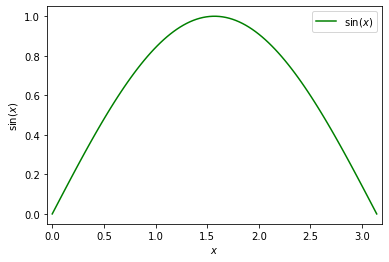

In [17]:
#We make the plot (it automatically generates the figure)
plt.plot(x,y,'-',color='green',label='$\sin(x)$')
#We add the label to the X and Y axes
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
#We generate the legend
plt.legend()
#We change the limits of the X and Y axes
plt.xlim(-0.05,np.pi+0.05)
plt.ylim(-0.05,1.05)

**Exercise: Generate and plot a 2D histogram using matplotlib**

In [18]:
#plt.hist2d

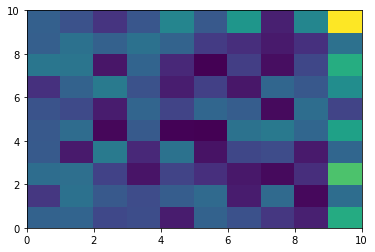

In [19]:
# %load ex2.py
def ex2():
    rs = np.random.RandomState(112)
    x=np.linspace(0,10,11)
    y=np.linspace(0,10,11)
    X,Y = np.meshgrid(x,y)
    X=X.flatten()
    Y=Y.flatten()
    weights=np.random.random(len(X))
    plt.hist2d(X,Y,weights=weights); #The semicolon here avoids that Jupyter shows the resulting arrays
ex2()

### 4.2) Seaborn (https://web.stanford.edu/~mwaskom/software/seaborn/)

Seaborn is a Python package based on matplotlib that includes some convenient plotting functions for statistical analysis. (Some people also like more its default style)

In [20]:
#First let's import seaborn (a warning will appear because it conflicts with %pylab inline)
import seaborn as sns

#### Warning messages: Jupyter will output with a pink background all its warning messages. Most of them will tell us about deprecation or definition conflicts. The messages only appear the first time you run a cell that arises a warning.

(-0.05, 1.05)

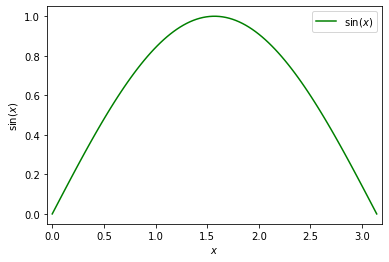

In [21]:
#Compare with matplotlib style (you can still use the same commands but they will render in seaborn style)
#We make the plot (it automatically generates the figure)
plt.plot(x,y,'-',color='green',label='$\sin(x)$')
#We add the label to the X and Y axes
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
#We generate the legend
plt.legend()
#We change the limits of the X and Y axes
plt.xlim(-0.05,np.pi+0.05)
plt.ylim(-0.05,1.05)

**Exercise: Plot again your 2D histogram using seaborn jointplot (https://web.stanford.edu/~mwaskom/software/seaborn/examples/hexbin_marginals.html)**

In [22]:
#sns.jointplot()

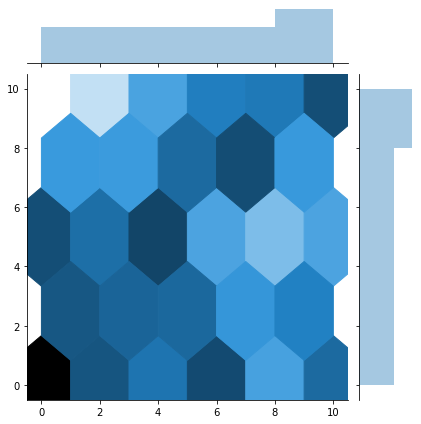

In [23]:
# %load ex3.py
def ex3():
    rs = np.random.RandomState(112)
    x=np.linspace(0,10,11)
    y=np.linspace(0,10,11)
    X,Y = np.meshgrid(x,y)
    X=X.flatten()
    Y=Y.flatten()
    weights=np.random.random(len(X))
    sns.jointplot(X,Y,kind='hex',joint_kws={'C':weights}); #The semicolon here avoids that Jupyter shows the resulting arrays
ex3()

## 5) Use interactive documentation

Jupyter also makes easier the use of new packages providing interactive documentation. The command ```help(name_of_the_package)``` lists the available documentation for a pacakge. ```?name``` provides information about the package. **shift+tab** provides the arguments to a function.

## 6) Reading astronomical data (FITS)

Some of us have struggled a little while creating a FITS file using, for example, `cfitsio` (you have to initialize status and things like that). The syntax is also kind of obscure and you have to be sure of the format of the variables you are reading. Reading images or FITS tables using Python and Jupyter is much easier and intuitive (and it is not much slower).

There are basically two ways of reading a fits file using ```astropy```:

 1. Using ```astropy.io.fits```: The ```astropy.io.fits``` module (originally ```PyFITS```) is a “pure Python” FITS reader in that all the code for parsing the FITS file format is in Python, though Numpy is used to provide access to the FITS data. ```astropy.io.fits``` currently also accesses the CFITSIO to support the FITS Tile Compression convention, but this feature is optional. It does not use CFITSIO outside of reading compressed images.
 2. Using ```astropy.table```: It uses internally ```astropy.io.fits``` it is very convenient for BinarytableHDU in FITS.

*There exist other ways to read fits files using Python. For example, you can use the ```fitsio``` package (to install it do ```pip install fitsio```). This other package is faster and works better for large files than astropy, making it necessary when performance is a strong requirement or constrained. However, it doesn't work under Windows and it needs to have a C compiler installed. The ```fitsio``` interface is pretty similar to astropy.table but, it is not identical (some of the things learned here can be directly applied and some other cannot)*

### 6.1) Reading and plotting an image

First we are going to download a small image from the WeakLensingDeblending package, which simulates one CCD chip in LSST at full depth (http://weaklensingdeblending.readthedocs.io/en/latest/products.html). The data can be downloaded using the link in here: ftp://ftp.slac.stanford.edu/groups/desc/WL/LSST_i_trimmed.fits.gz or from this repository.

First we are going to use ```astropy.io.fits``` to read the FITS file as an hdulist (that includes an image HDU and a BinaryTableHDU)

In [25]:
#We import the package needed to read the file
import astropy.io.fits as fits

In [26]:
path = './downloaded_data/LSST_i_trimmed.fits.gz'
#We open the file and it gives us an hdulist
hdulist = fits.open(path)

In [27]:
#We can check what this hdulist has using print
print(hdulist)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1a22667cc0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a22696978>]


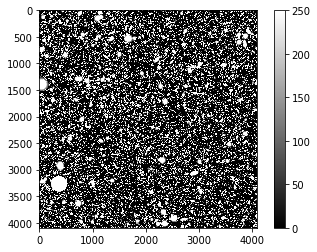

In [28]:
#We are going to see what is in the image, we use imshow and select a gray colormap
#we also select a minimum of 0 in the colorbar (vmin) and a maximum of 250 (vmax)
plt.imshow(hdulist[0].data,vmin=0,vmax=250,cmap='gray')
#Show the colorbar
plt.colorbar()

Now we are going to use ```astropy.table``` to read the BinaryTableHDU. We could also read it using ```hdulist[1].data``` but let's make use of this nice package

In [29]:
#Importing astropy.table
import astropy.table

In [30]:
#reading the table. In a multi-hdu file we can specify the hdu with read(path,hdu=num_hdu)
table = astropy.table.Table.read(path)

In [31]:
#we show the contents of the table
table

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,flux,sigma_m,sigma_p,e1,e2,a,b,beta,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp
int64,int64,int16,int16,bool,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2214322509,2200170838,12,11,True,3239,3244,447,451,1.0,0.0,238.81874,-319.69296,0.5164006,27.41686,12149.348,1.0808778,1.1103135,0.07375298,-0.14636588,1.2752763,0.9161126,-0.55201894,0.62914556,0.6421569,0.6420982,0.6420636,0.04835268,0.048349965,16.809717,10.936301,8.755643,16.810675,10.936884,8.756067
2213221225,2200170838,12,7,True,3202,3208,453,460,1.0,0.0,231.50682,-318.24,2.965477,27.28049,13775.293,0.14556168,0.151919,-0.17614946,0.10813427,0.1795248,0.11802382,1.2955157,0.6112427,2.7514262,2.7502596,2.74966,1.7320012,1.7298665,3.5648274,3.2924986,2.9756277,3.5665708,3.293262,2.9763541
2213832765,2200170838,12,8,True,3216,3223,456,462,1.0,0.0,234.3976,-317.69965,0.6830657,27.360697,12794.357,0.14859498,0.15103929,0.007003341,-0.12753516,0.1689585,0.13068575,-0.7579692,0.64785975,2.5466394,2.5456374,2.5451913,1.5721526,1.5708753,3.49963,3.0837848,3.3094187,3.5008566,3.0843349,3.310034
2214602712,2206640565,2,1,True,3150,3157,458,465,1.0,0.0,221.17453,-317.1877,3.23816,27.495546,11300.006,0.15234789,0.15842652,-0.13086545,0.14825156,0.18615031,0.12468353,1.1469926,0.9700798,2.2369087,2.2361379,2.2361293,1.3698084,1.35325,4.199645,3.604134,3.7455993,4.2177544,3.6300166,3.7530982
2201272641,2200170838,12,1,True,3179,3200,413,428,0.9304385,0.069561474,228.38474,-325.3608,1.2329979,23.910084,307088.6,0.37182564,0.46140036,0.4577093,-0.05525183,0.6121921,0.22583482,-0.060066268,0.97112644,47.780575,47.51439,47.509373,30.434614,29.415697,0.08790836,0.081539385,0.044164617,0.089632496,0.08325546,0.04468717
2209286187,2200170838,12,10,True,3187,3193,426,432,1.0,0.0,228.49287,-323.7509,0.7936422,26.558786,26778.277,1.9025122,1.9223332,0.092074834,-0.043432027,2.1071439,1.7177529,-0.22037764,0.25707325,0.74702644,0.7469612,0.7467752,0.04282351,0.04276636,15.815431,9.297996,8.380438,15.833634,9.316914,8.386252
2216818333,2208277203,2,1,True,3181,3187,461,466,1.0,0.0,227.28868,-316.74384,2.118073,27.989279,7171.098,0.13260557,0.13363153,0.07811977,-0.04005497,0.14480612,0.12143296,-0.23689297,0.7217,1.4248347,1.4245026,1.4244055,0.7755764,0.6615258,8.230795,7.490113,7.3731465,8.762747,7.953091,7.8608136
2208277203,2208277203,2,0,True,3176,3186,454,464,0.70485467,0.29514533,226.7415,-317.66183,2.4714687,26.370668,31844.162,0.33012074,0.33087686,0.0061048926,0.047439735,0.34630707,0.31469092,0.7214062,0.972163,5.2287884,5.2251277,5.225091,2.887662,2.449195,0.9308479,0.75631136,0.77360666,1.0370955,0.8263584,0.88836354
2203591562,2200170838,12,2,True,3192,3204,406,418,0.92056733,0.07943267,230.07646,-327.10104,0.9983494,25.033432,109125.03,0.2182091,0.22197437,0.13078311,-0.0014981583,0.24888702,0.19131257,-0.005727394,0.94416136,20.389246,20.331697,20.32944,13.599306,13.475756,0.23590538,0.22365159,0.21086797,0.23906615,0.22616035,0.21170163


We can also select any column by simply using ```table['NAME_OF_THE_COLUMN']```

In [32]:
#We print the purity column of the table
print(table['purity'])

  purity  
----------
0.62914556
 0.6112427
0.64785975
 0.9700798
0.97112644
0.25707325
    0.7217
  0.972163
0.94416136
 0.9569092
       ...
0.96751463
 0.9565557
       1.0
 0.6571343
0.82408595
       1.0
 0.5067259
 0.8917873
 0.9990267
       1.0
       1.0
Length = 45114 rows


**Exercise: Make a histogram of the signal to noise `snr_iso` for different purity cuts (Hint: lookup the documentation for `np.hist` and make use of numpy masks)** 

In [33]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


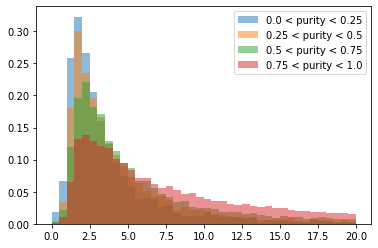

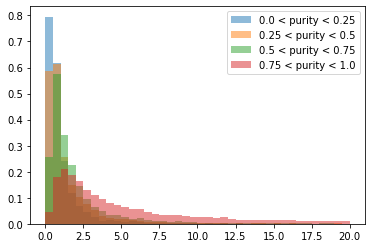

In [34]:
# %load ex4.py
def ex4():
    masks = [np.logical_and(table['purity']>i/4.,table['purity']<(i+1)/4.) for i in range(0,4)]
    for i in range(0,4):
        label = str(i/4.)+' < purity < '+str((i+1)/4.)
        plt.hist(table['snr_iso'][masks[i]],range=(0,20),bins=40, label=label, alpha=0.5, normed=True)
    plt.legend()
    plt.figure()
    for i in range(0,4):
        label = str(i/4.)+' < purity < '+str((i+1)/4.)
        plt.hist(table['snr_grpf'][masks[i]],range=(0,20),bins=40, label=label, alpha=0.5, normed=True)
    plt.legend()
ex4()

**Exercise: Repeat that with ```snr_grpf```**

### 6.2) Using seaborn to create useful plots

In [35]:
#We are going to use some columns of the table above to produce a useful pairplot
#We make use of numpy masks!
selection = np.empty(len(table['snr_grpf']),dtype='a20')
mask_03 = table['purity']<=0.3
mask_06 = np.logical_and(table['purity']>0.3,table['purity']<=0.6)
mask_09 = np.logical_and(table['purity']>0.6,table['purity']<=0.9)
mask_1 = table['purity']>0.9
selection[mask_03]="purity<=0.3"
selection[mask_06]="0.3<purity<=0.6"
selection[mask_09]="0.6<purity<=0.9"
selection[mask_1]="purity>0.9"
#We require the values dg1 and dg2 to be finite in order that seaborn creates automatically the histograms
masked_array = np.logical_not(np.logical_or(np.isinf(table['dg1_grp']),np.isinf(table['dg2_grp'])))
#We are going to plot just 1000 points
nobj=500
#We will use certain columns of the table
cols = [selection[masked_array][0:nobj],table['dg1_grp'][masked_array][0:nobj], \
        table['dg2_grp'][masked_array][0:nobj],table['e1'][masked_array][0:nobj], \
       table['e2'][masked_array][0:nobj]]
new_table = astropy.table.Table(cols,names=('selection','dg1_grp','dg2_grp','e1','e2'))
#Seaborn pairplot requires a pandas data frame
df = new_table.to_pandas()

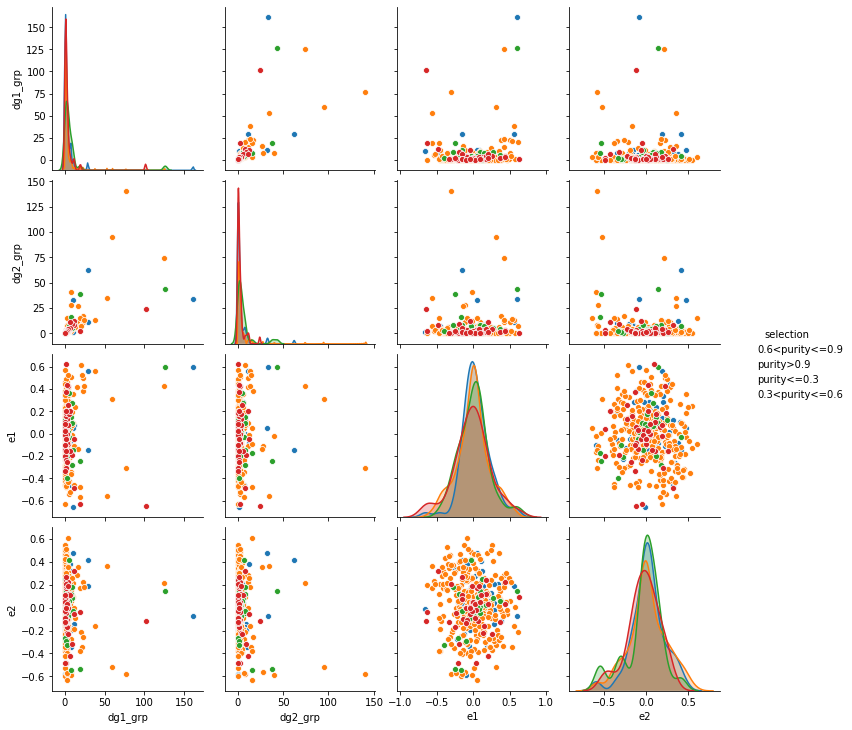

In [36]:
sns.pairplot(df, hue='selection')

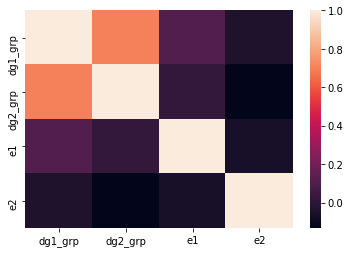

In [37]:
#We are going to check the correlations using heatmap
corr = df.corr()
sns.heatmap(corr)

## 7) Keep track of the units. Use astropy.units

Sometimes it is difficult to keep track of which units you are using when you write very long programs. This is simplified when you use astropy.units (http://docs.astropy.org/en/stable/units/). The package also handles equivalences and makes easy the unit conversion. It raises an error if you are operating with incompatible units.

In [38]:
import astropy.units as u

In [39]:
x = 10*u.km

In [40]:
x.to(u.imperial.mile) + 10*u.Mpc

<Quantity 1.91735116e+20 mi>

Let's see an example where some units are assumed

In [41]:
#We read a quasar-catalog data table
quasar_table = astropy.table.Table.read('./downloaded_data/quasar_table.fits')

In [44]:
#We import speclite to compute magnitudes
import speclite
import speclite.filters
sdss = speclite.filters.load_filters('sdss2010-*')
#Spectrum of quasar #40
wave = np.load('./downloaded_data/wave.npy') #No units included but units are Angstroms
flux = np.load('./downloaded_data/flux.npy') #It comes without units but they're 1e-17 erg/cm**2/s/AA
#We use get magnitudes to compute the magnitudes. If the units are not included, it assumes (erg/cm**2/s/AA, AA)<-(flux, wave)
mags = sdss.get_ab_magnitudes(flux*1e-17*u.erg/u.cm**2/u.s/u.AA,wave*u.AA)
#If we don't use the correct units...
mags_wrong = sdss.get_ab_magnitudes(flux,wave)
mags_boss = np.hstack(quasar_table['PSFMAG_%d' %f][40] for f in range(0,5))
print(mags)
print(mags_boss)
print(mags_wrong)

    sdss2010-u         sdss2010-g    ...     sdss2010-i         sdss2010-z   
------------------ ----------------- ... ------------------ -----------------
20.201987998367812 19.31219028884282 ... 19.043865788860423 19.01946156383772
[20.44052124 19.25792122 19.00582886 18.77737045 18.67336845]
    sdss2010-u         sdss2010-g     ...      sdss2010-i         sdss2010-z    
------------------ ------------------ ... ------------------- ------------------
-22.29801203437915 -23.18780972963916 ... -23.456218087118348 -23.48055936560133


//anaconda3/lib/python3.7/site-packages/speclite/filters.py:1466: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values_no_units = values_no_units[values_slice]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


## 8) A complete example: How to make a redshift fitter (photo-z) using sklearn.

In [45]:
#Now we are going to prepare a Boosted decision tree photo-z estimator
from sklearn.ensemble import GradientBoostingRegressor
#Prepare the training array
mags = np.vstack([quasar_table['PSFMAG_%d' % f] for f in range(0,5)]).T
z = quasar_table['Z_VI']
print(len(z))
#train on 20% of the points
mag_train = mags[::5]
z_train = z[::5]
print(len(z_train))
#test on 5% of the points
mag_test = mags[::18]
z_test = z[::18]
#Set up the tree
clf = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,max_depth=3, random_state=0)
#Train the tree
clf.fit(mag_train, z_train)
#Test it!
z_fit_train = clf.predict(mag_train)
z_fit = clf.predict(mag_test)
#Compute rms in the training set and test set
rms_train = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
rms_test = np.mean(np.sqrt((z_fit - z_test) ** 2))

297301
59461


Text(0, 0.5, '$z_{fit}$')

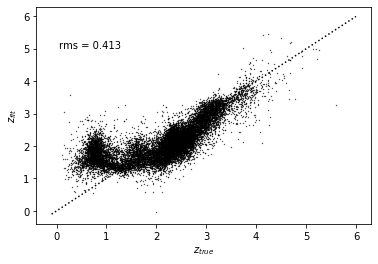

In [46]:
plt.scatter(z_test,z_fit, color='k', s=0.1)
plt.plot([-0.1, 6], [-0.1, 6], ':k')
plt.text(0.04, 5, "rms = %.3f" % (rms_test))
plt.xlabel('$z_{true}$')
plt.ylabel('$z_{fit}$')

**Exercise**: Train and evaluate the performance of the tree using colors instead of the magnitudes themselves

In [47]:
# %load ex6.py
def ex6():
    colors = np.vstack([quasar_table['PSFMAG_%d' % f]-quasar_table['PSFMAG_%d' % (f+1)] for f in range(0,4)]).T
    color_train = colors[::5]
    color_test = colors[::18]
    clf.fit(color_train, z_train)
    #Test it!
    z_fit_train = clf.predict(color_train)
    z_fit = clf.predict(color_test)
    #Compute rms in the training set and test set
    rms_train = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
    rms_test = np.mean(np.sqrt((z_fit - z_test) ** 2))
    plt.scatter(z_test,z_fit, color='k', s=0.1)
    plt.plot([-0.1, 6], [-0.1, 6], ':k')
    plt.text(0.04, 5, "rms = %.3f" % (rms_test))
    plt.xlabel('$z_{true}$')
    plt.ylabel('$z_{fit}$')


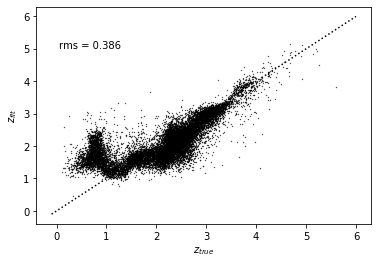

In [48]:
ex6()

**Optional exercise**: Create a nearest-neighbors estimator (KNN) using ```from sklearn.neighbors import KNeighborsRegressor```

In [ ]:
# %load opt_ex1.py

### 8.b) Extra: Deep Neural Network photo-z (you need keras and theano or tensorflow for this part)

I am going to use a Recurrent Neural network, it may not be the optimal choice but, this is to illustrate how to set up the network. More on recurrent neural networks here: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Optional exercise**: Create your own Neural Network photo-z estimator

In [ ]:
# %load opt_nn.py

## 9) Create a lognormal simulation and compute its correlation function

We will use randomfield to create a gaussian random field

In [ ]:
import randomfield

In [ ]:
%time generator = randomfield.Generator(8, 128, 1024, grid_spacing_Mpc_h=1.0, verbose=True)

In [ ]:
delta = generator.generate_delta_field(smoothing_length_Mpc_h=2.0, seed=123, show_plot=True)

We will try to calculate the correlation function in the direction of the line-of-sight:

$$\xi_{\parallel}(r)=\langle \delta(r') \delta(r+r')\rangle$$

In [ ]:
%%time
#Let's compute a simple version of the correlation function in the direction of the direction of the line-of-sight
corr = np.zeros(delta.shape[2])
for i in range(1,delta.shape[2]-1):
    corr[i]=np.sum(delta[:,:,i:]*delta[:,:,:-i])/(delta.shape[0]*delta.shape[1]*(delta.shape[2]-1))

In [ ]:
r = np.linspace(0,delta.shape[2],delta.shape[2]+1)
plt.plot(r[1:-1],r[1:-1]**2*corr[1:])
plt.xlim(0,200)
plt.xlabel(r'$r_{\parallel}$ [Mpc h$^{-1}$]')
plt.ylabel(r'$r_{\parallel}^{2}*\xi_{\parallel}(r_{\parallel})$ [Mpc$^{2}$ h$^{-2}$]')
plt.ylim(-4500,300);

## 10) Create sky plots

Healpy (http://healpy.readthedocs.io/en/latest/) includes tools for visualizing skymaps but, what if we want to use different projections? Or what if we cannot use healpy? See [here](https://github.com/dkirkby/bossdata/blob/master/examples/nb/MakingSkyPlots.ipynb), and [here](http://usersguidetotheuniverse.com/index.php/2011/03/03/whats-the-best-map-projection/) for more info.

In [ ]:
def plot_sky(ra, dec, data=None, nside=4, label='', projection='eck4', cmap=plt.get_cmap('jet'), norm=None,
             hide_galactic_plane=False, healpy=False):
    from mpl_toolkits.basemap import Basemap
    from matplotlib.collections import PolyCollection
    from astropy.coordinates import SkyCoord
    ra=ra.to(u.deg).value
    dec=dec.to(u.deg).value
    if(healpy):
        import healpy as hp
        # get pixel area in degrees
        pixel_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)
        # find healpixels associated with input vectors
        pixels = hp.ang2pix(nside, 0.5*np.pi-np.radians(dec), np.radians(ra))
        # find unique pixels
        unique_pixels = np.unique(pixels)
        # count number of points in each pixel
        bincounts = np.bincount(pixels)
        # if no data provided, show counts per sq degree
        # otherwise, show mean per pixel
        if data is None:
            values = bincounts[unique_pixels]/pixel_area
        else:
            weighted_counts = np.bincount(pixels, weights=data)
            values = weighted_counts[unique_pixels]/bincounts[unique_pixels]
        # find pixel boundaries
        corners = hp.boundaries(nside, unique_pixels, step=1)
        corner_theta, corner_phi = hp.vec2ang(corners.transpose(0,2,1))
        corner_ra, corner_dec = np.degrees(corner_phi), np.degrees(np.pi/2-corner_theta)
        # set up basemap
        m = Basemap(projection=projection, lon_0=-90, resolution='c', celestial=True)
        m.drawmeridians(np.arange(0, 360, 30), labels=[0,0,1,0], labelstyle='+/-')
        m.drawparallels(np.arange(-90, 90, 15), labels=[1,0,0,0], labelstyle='+/-')
        m.drawmapboundary()
        # convert sky coords to map coords 
        x,y = m(corner_ra, corner_dec)
        # regroup into pixel corners
        verts = np.array([x.reshape(-1,4), y.reshape(-1,4)]).transpose(1,2,0)
        # Make the collection and add it to the plot.
        coll = PolyCollection(verts, array=values, cmap=cmap, norm=norm, edgecolors='none')
        plt.gca().add_collection(coll)
        plt.gca().autoscale_view()
        if not hide_galactic_plane:
            # generate vector in galactic coordinates and convert to equatorial coordinates
            galactic_l = np.linspace(0, 2*np.pi, 1000)
            galactic_plane = SkyCoord(l=galactic_l*u.radian, b=np.zeros_like(galactic_l)*u.radian, frame='galactic').fk5
            # project to map coordinates
            galactic_x, galactic_y = m(galactic_plane.ra.degree, galactic_plane.dec.degree)
            m.scatter(galactic_x, galactic_y, marker='.', s=2, c='k')
        # Add a colorbar for the PolyCollection
        plt.colorbar(coll, orientation='horizontal', pad=0.01, aspect=40, label=label)
    else:
        nx, ny = nside, nside

        ra_bins = numpy.linspace(-180, 180, nx+1)
        cth_bins = numpy.linspace(-1., 1., ny+1)
        ra[ra>180]=ra[ra>180]-360
        density, _, _ = numpy.histogram2d(ra, np.sin(dec*np.pi/180.), [ra_bins, cth_bins])
        ra_bins_2d, cth_bins_2d = numpy.meshgrid(ra_bins, cth_bins)
        m = Basemap(projection=projection, lon_0=0, resolution='l', celestial=True)
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,1,0], labelstyle='+/-')
        m.drawparallels(np.arange(-90, 90, 15), labels=[1,0,0,0], labelstyle='+/-')
        m.drawmapboundary()
        xs, ys = m(ra_bins_2d, np.arcsin(cth_bins_2d)*180/np.pi)
        pcm = plt.pcolormesh(xs, ys, density)
        plt.colorbar(pcm,orientation='horizontal', pad=0.04, label=label)
        if not hide_galactic_plane:
            # generate vector in galactic coordinates and convert to equatorial coordinates
            galactic_l = np.linspace(0, 2*np.pi, 1000)
            galactic_plane = SkyCoord(l=galactic_l*u.radian, b=np.zeros_like(galactic_l)*u.radian, frame='galactic').fk5
            # project to map coordinates
            galactic_x, galactic_y = m(galactic_plane.ra.degree, galactic_plane.dec.degree)
            m.scatter(galactic_x, galactic_y, marker='.', s=2, c='k')

In [ ]:
ra = 360*np.random.random(10000)*u.deg
dec = np.arcsin(-1+2*np.random.random(10000))*180/np.pi*u.deg
plot_sky(ra,dec,healpy=False, nside=16, projection='eck4', label='Galaxies per pixel')

**Exercise: Plot the positions of the quasars**

In [ ]:
# %load ex7.py
def ex7():
    plot_sky(quasar_table['RA']*u.deg,quasar_table['DEC']*u.deg,nside=128, healpy=False)


In [ ]:
ex7()

## 11) Using astropy.cosmology (http://docs.astropy.org/en/stable/cosmology/)

astropy.cosmology is a subpackage that contains several cosmologies implemented (LCDM, wCDM, etc) and computes some useful quantities for them such as: comoving distance, $H(z)$ or transverse separations from angular separations at redshift $z$.

**Example: Using $\Lambda CDM$ with Planck 2015 cosmological parameters**

In [ ]:
from astropy.cosmology import Planck15

In [ ]:
print(Planck15.__doc__)

In [ ]:
z=np.logspace(-4,4,30)
om=Planck15.Om(z)
ob=Planck15.Ob(z)
plt.plot(z,om,label=r'$\Omega_{m}(z)$')
plt.plot(z,ob,label=r'$\Omega_{b}(z)$')
plt.legend(loc=2)
plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\Omega(z)$')

In [ ]:
h=Planck15.H(z)
plt.plot(z,h,label=r'$H(z)$')
plt.legend(loc=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$H(z)$ %s' % h.unit)

In [ ]:
from astropy.cosmology import z_at_value
z_at_value(Planck15.comoving_distance, 1200 *u.Mpc)

In [ ]:
from astropy.cosmology import w0waCDM
cosmo = w0waCDM(H0=75*u.km/u.s/u.Mpc,Om0=0.3,Ode0=0.7,w0=-1.2,wa=-3,Neff=4,Ob0=0.044,m_nu=1e-5*u.eV)

In [ ]:
h_cosmo = cosmo.H(z)
plt.plot(z,h_cosmo, label='Random cosmology')
plt.plot(z,h, label='Planck15')
plt.legend(loc=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$H(z)$ %s' % h.unit)

In [ ]:
plt.plot(z,h_cosmo/h-1)
plt.legend(loc=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$H_{cosmo}(z)/H_{Planck15}(z)$')